##                                        1) SENTIMENT ANALYSIS OF TWITTER DATA

In [1]:
import nltk
from nltk.corpus import twitter_samples

# Using the twitter data from the nltk library

In [2]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [3]:
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

In [4]:
tweets = positive_tweets + negative_tweets
sentiment = [1] * len(positive_tweets) + [0] * len(negative_tweets)

In [5]:
num_tweets = len(tweets)
num_tweets

10000

In [6]:
num_sentiment = len(sentiment)
num_sentiment

10000

In [7]:
import random
combined = list(zip(tweets, sentiment))
random.shuffle(combined)
tweets, sentiment = zip(*combined)

## Text preprocessing

In [8]:
import re
def clean_tweet(tweet):
    tweet = re.sub(r"http\S+|www\S+|https\S+", "", tweet)
    tweet = re.sub(r"@\w+|#\w+", "", tweet)
    return tweet
cleaned_tweets = [clean_tweet(tweet) for tweet in tweets]

### Text vectorization

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tweets_vectorized = vectorizer.fit_transform(cleaned_tweets)

In [10]:
print(tweets_vectorized)

  (0, 7205)	0.33230591011449345
  (0, 2457)	0.33230591011449345
  (0, 3236)	0.33230591011449345
  (0, 10072)	0.27978952773260674
  (0, 4639)	0.3181486860876179
  (0, 2178)	0.23549817280195043
  (0, 10583)	0.33230591011449345
  (0, 7071)	0.17461337052649825
  (0, 6887)	0.12606669590168704
  (0, 6964)	0.1622169907211976
  (0, 9904)	0.093330857123688
  (0, 1227)	0.33230591011449345
  (0, 7133)	0.26195353482050066
  (0, 9782)	0.1332691616810724
  (0, 1920)	0.21240477636181782
  (1, 4255)	0.3038153983182595
  (1, 423)	0.34081233381844894
  (1, 2491)	0.3174522347911958
  (1, 5778)	0.29148150075141765
  (1, 6926)	0.4992576042154267
  (1, 5024)	0.32755069756277594
  (1, 1022)	0.4992576042154267
  (2, 6964)	0.7726807167323004
  (2, 9782)	0.6347948566190958
  (3, 6567)	0.46656758113630686
  :	:
  (9996, 9575)	0.2740318961112856
  (9996, 6421)	0.27492613287612455
  (9996, 6970)	0.22975937543206906
  (9996, 10821)	0.22353198851263809
  (9996, 5612)	0.283931233391329
  (9996, 10702)	0.2448650698429

In [11]:
print(sentiment)

(1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 

# Data splitting

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(tweets_vectorized,sentiment,test_size=0.3,random_state=2)

In [13]:
from collections import Counter

# Assuming y_test is your list of labels
counter = Counter(y_test)

# Print counts of each unique value
for label, count in counter.items():
    print(f"{label}: {count}")


1: 1489
0: 1511


# Model training using Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

# Accuracy

In [15]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print(" Training Accuracy:", accuracy)

 Training Accuracy: 0.8755714285714286


In [16]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", accuracy)

Testing Accuracy: 0.7673333333333333


# Confusion Matrix

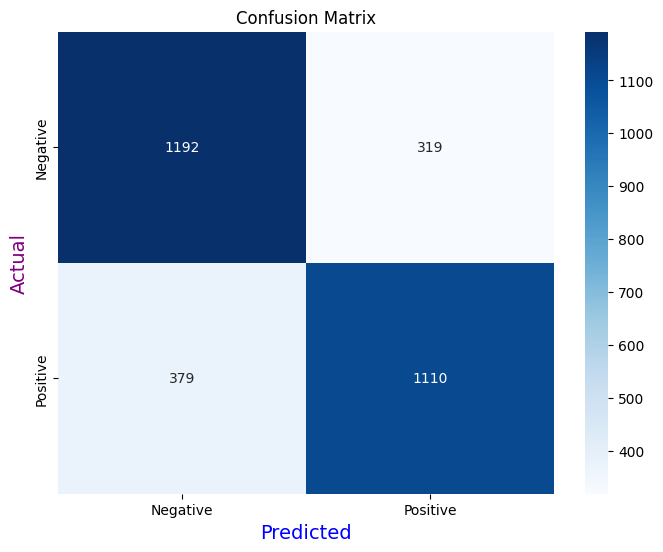

In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
y_predicted = model.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
class_labels = ['Negative', 'Positive']
cmap = sns.diverging_palette(220, 20, as_cmap=True)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted', fontsize=14, color='blue')
plt.ylabel('Actual', fontsize=14, color='purple')
plt.title('Confusion Matrix')
plt.show()

# Model training using Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train,y_train)

# Accuracy

In [19]:
y_pred = clf.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print("Training Accuracy:", accuracy)

Training Accuracy: 0.9012857142857142


In [20]:
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", accuracy)

Testing Accuracy: 0.7666666666666667


# Confusion Matrix

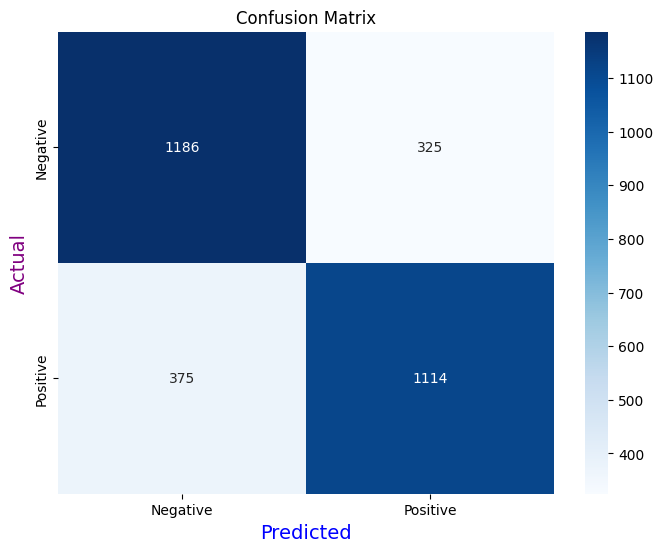

In [21]:
y_predicted = clf.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
class_labels = ['Negative', 'Positive']
cmap = sns.diverging_palette(220, 20, as_cmap=True)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted', fontsize=14, color='blue')
plt.ylabel('Actual', fontsize=14, color='purple')
plt.title('Confusion Matrix')
plt.show()